In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
#X2 can be done to increase the bias. This will make your equation better
y = 4 + 3* X + np.random.randn(100,1)
#do the same for the y

In [2]:
X_bias = np.c_[np.ones((100,1)), X]

theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

In [3]:
theta_best

array([[4.315567 ],
       [2.6569315]])

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.315567]), array([[2.6569315]]))

In [5]:
#note that the equation for the function we are using is y = 3x + 4
X_new = np.array([[0], [2]])
#hypothetically, 0 and 2 should yield the answers 4 and 9 respectively
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict
#we predicted close because our machine has learned :D

array([[4.315567  ],
       [9.62943001]])

In [6]:
eta = 0.1

#with more iteration comes a more accurate answer
n_iteration = 1000

m = 100

theta = np.random.randn(2,1)

#bacth gradient
for iteration in range(n_iteration):
    gradients = 2 / m * X_bias.T.dot(X_bias.dot(theta) - y)
    theta = theta - eta * gradients

In [7]:
theta

array([[4.315567 ],
       [2.6569315]])

In [8]:
n_epochs = 50
t0, t1 =5, 50


def learning_schedule(t):
    return t0/ (t + t1)#whenever time has passed, make the learning grade smaller

theta = np.random.randn(2,1)
#stochastic gradient
for epoch in range(m):
    for i in range(m):
        random_index= np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [9]:
theta #find out the main difference between stochastic and batch gradients

array([[4.24627504],
       [2.64221224]])

In [10]:
from sklearn.preprocessing import PolynomialFeatures

#number of instances
m = 100
#random x that we have chosen
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
#** means squared



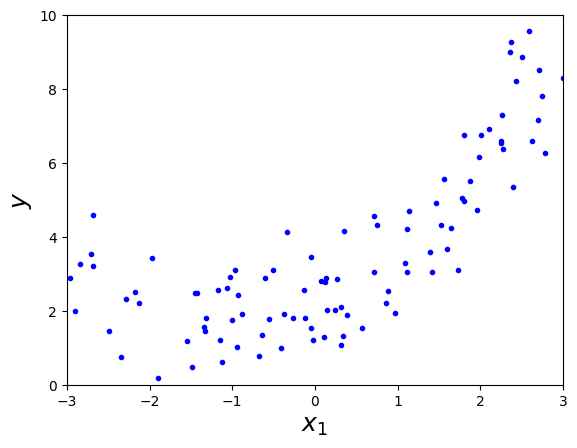

In [11]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize = 18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X_poly[0]
#the first was the original, the second is the squared

array([-2.49183763,  6.20925476])

In [13]:
X[0]

array([-2.49183763])

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.12680108]), array([[0.94884093, 0.45382224]]))

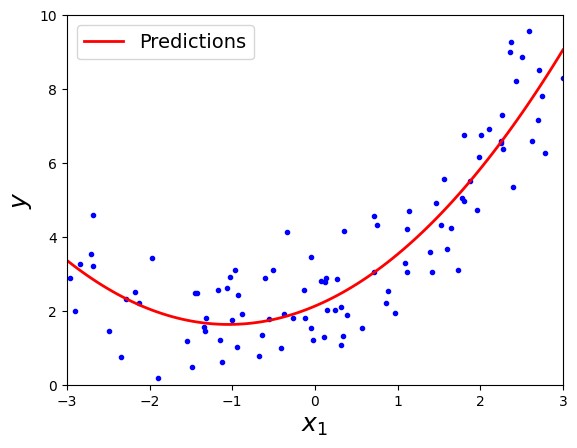

In [15]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0, solver='auto')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.88446097]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.86230499])

In [18]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.84132674])

In [19]:
from sklearn.linear_model import ElasticNet

elasticnet_reg = ElasticNet(alpha=0.1)
elasticnet_reg.fit(X,y)
elasticnet_reg.predict([[1.5]])

array([4.84117338])

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris['target'] )